In [32]:
import itertools
from collections import namedtuple

from algorithm import run_more_plots, accuracy

from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def get_labels(X, y, tr, num_iters=40) -> [dict]:
    """
    Run our method and spectral clustering on inputs
    
    :param X: input data
    :param y: labels
    :returns: a list of dictionaries containing the predicted labels with
              2 keys: `our_labels`, `spectral_labels`
    """
    n_clusters = len(set(y))

    # normalize
    X = X - X.mean(0)
    X = X / X.std(0)
    
    alphas = [0.01, 0.1, 0.5, 1, 5]
    lambda_lassos = [0.01, 0.1, 0.5, 1, 5]

    outs = []
    for alpha, lambda_lasso in itertools.product(alphas, lambda_lassos):
        out = run_more_plots(X, y, num_iters, alpha, lambda_lasso, tr, n_clusters=n_clusters, plot=False, is_print=True, auto=True)
        out['alpha'] = alpha
        out['lambda_lasso'] = lambda_lasso
        outs.append(out)
    
    return outs

def get_performance(out, y, is_print=False) -> dict:
    """Get performance of one prediction"""

    our_nmi = normalized_mutual_info_score(y, out['our_labels'])
    our_acc = accuracy(y, out['our_labels'])
    our_ari = adjusted_rand_score(y, out['our_labels'])

    sp_nmi = normalized_mutual_info_score(y, out['spectral_labels'])
    sp_acc = accuracy(y, out['spectral_labels'])
    sp_ari = adjusted_rand_score(y, out['spectral_labels'])
    
    if is_print:
        print(f'our acc: {our_acc:.2f}, our nmi: {our_nmi:.2f}, our ari: {our_ari:.2f}, sp acc: {sp_acc:.2f}, sp nmi: {sp_nmi:.2f}, sp ari: {sp_ari:.2f}')
 
    performance = {
        'our_nmi': our_nmi,
        'our_acc': our_acc,
        'our_ari': our_ari,
        'sp_nmi': sp_nmi,
        'sp_acc': sp_acc,
        'sp_ari': sp_ari
    }
    
    return performance
    
    
def get_performances(outs, y, best=False, is_print=False) -> [dict]:
    """Print clustering performance metrics"""
    
    performances = None
    
    # if best==True pick the one with hieghst nmi
    if best:
        best_out = list(sorted(outs,
                               key=lambda out: normalized_mutual_info_score(y, out['our_labels']),
                               reverse=True
                              ))[0]
        performances = [get_performance(best_out, y, is_print)]
    else:
        performances = [get_performance(out, y) for out in outs]
    
    return performances


def plot_nmis(iters, our_nmis, sp_nmis) -> None:
    plt.plot(iters, our_nmis, marker='o', label='our method')
    plt.plot(iters, sp_nmis, marker='o', label='spectral method')
    plt.xticks(iters[::2])
    plt.xlabel('iteration')
    plt.ylabel('NMI')
    plt.legend()
    plt.show()
    
def plot_accs(iters, our_accs, sp_accs) -> None:
    plt.plot(iters, our_accs, marker='o', label='our method')
    plt.plot(iters, sp_accs, marker='o', label='spectral method')
    plt.xticks(iters[::2])
    plt.xlabel('iteration')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def run_and_plot_iterations(X, y, tr=0.01) -> None:
    """Run our algorithm with different number of iterations and plot performances"""
    
    iters = list(range(1, 21))
    perfs = []

    for i in iters:
        outs = get_labels(X, y, tr=tr, num_iters=i)
        performance = get_performances(outs, y, best=True, is_print=False)[0]
        perfs.append(performance)

    our_nmis = [x['our_nmi'] for x in perfs]
    sp_nmis = [x['sp_nmi'] for x in perfs]
    plot_nmis(iters, our_nmis, sp_nmis)

    our_accs = [x['our_acc'] for x in perfs]
    sp_accs = [x['sp_acc'] for x in perfs]
    plot_accs(iters, our_accs, sp_accs)

## Iris dataset

"The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2"

|||
----|----
|# Instances | 150 |
|# Clusters | 3 | 
|# Attributes | 4 | 


In [34]:
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)

outs = get_labels(X, y, tr=0.2)
get_performances(outs, y, best=True, is_print=True)
print()

our acc: 0.66, our nmi: 0.72, our ari: 0.56, sp acc: 0.67, sp nmi: 0.68, sp ari: 0.54



## Breast cancer

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

|||
----|----
|# Instances | 569 |
|# Clusters | 2 | 
|# Attributes | 30 | 

In [36]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X = TSNE().fit_transform(X)
X, y = shuffle(X, y, random_state=0)

outs = get_labels(X, y, tr=0.2)
get_performances(outs, y, best=True, is_print=True)
print()

our acc: 0.88, our nmi: 0.48, our ari: 0.57, sp acc: 0.82, sp nmi: 0.41, sp ari: 0.41



## Wine dataset

"The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine."

|||
----|----
|# Instances | 178 |
|# Clusters | 3 | 
|# Attributes | 13 | 

In [38]:
X, y = datasets.load_wine(return_X_y=True)
X, y = shuffle(X, y, random_state=0)

outs = get_labels(X, y, tr=0.01)
get_performances(outs, y, best=True, is_print=True)
print()

our acc: 0.76, our nmi: 0.58, our ari: 0.45, sp acc: 0.40, sp nmi: 0.04, sp ari: 0.00



## Chain link dataset

An artificial dataset.

|||
----|----
|# Instances | 1000 |
|# Clusters | 2 | 
|# Attributes | 3 | 

In [39]:
data = np.genfromtxt('data/chainlink.arff.txt', delimiter=',')
X = data[:, 0:3]
y = np.array(data[:, 3], dtype=int)
X, y = shuffle(X, y, random_state=0)
y -= 1

outs = get_labels(X, y, tr=0.2)
get_performances(outs, y, best=True, is_print=True)
print()

our acc: 1.00, our nmi: 0.99, our ari: 1.00, sp acc: 1.00, sp nmi: 1.00, sp ari: 1.00



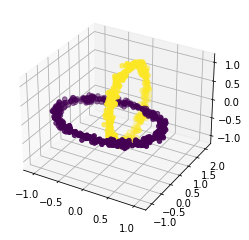

In [17]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)

# Conclusion

1. For Iris dataset, our algorithm is more optimal than spectral clustering in terms of NMI and ARI. But the accuracies are more or less the same
2. For Breast cancer dataset, since the data is high-dimensional (30 features per data point), I applied TSNE before doing clustering. Our algorithm outperforms spectral clustering in both accuracy and NMI. 
3. For the wine dataset our algorithm performs signigicantly better than spectral clustering.
4. For chain link dataset, both of the algorithms perform a perfect clustering.